# Regression Model Reviews
- see README.md for model details

In [72]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [73]:
# Using Scikit-learn
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [74]:
# create data
X, y = make_regression(n_samples=2000, n_features=1, noise=10, random_state=42)


In [75]:
# add outlier
for i in range(20):
    X = np.append(X,2 + 2*random.random())
    y = np.append(y,1250+ 200*random.random())

In [76]:
# reshape X so it is in column shape, y can remain in single array
X = X.reshape(-1,1)

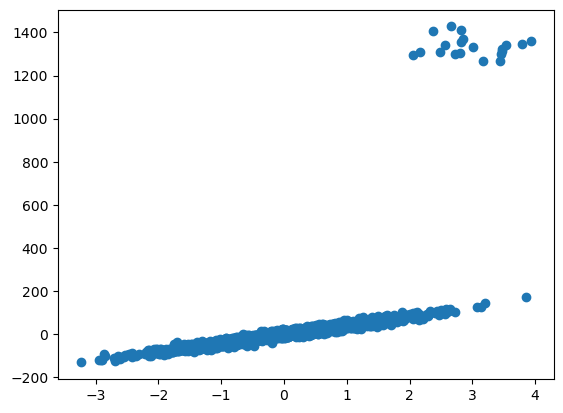

In [77]:
# visualize
plt.scatter(X,y)

In [78]:
# print equation function

def print_equation(model):
    coeff = model.coef_
    intercept = model.intercept_

    equation_str=""
    for i, c in enumerate(coeff):
        equation_str += f'{c:0.4f} x_{i} + '

    equation_str += str(round(intercept,4))

    return equation_str

In [79]:
# compare models
def XY_compare_regression(X,y):
    # OLS 
    ols = LinearRegression().fit(X, y)
    score = ols.score(X, y)
    eqn = print_equation(ols)
    print(f'OLS Score:  {score:0.2f}, Equation = {eqn}')

    # LASSO
    lasso = Lasso(alpha=30).fit(X, y)
    score = lasso.score(X, y)
    eqn = print_equation(lasso)
    print(f'LASSO Score:  {score:0.2f}, Equation = {eqn}')

    # RIDGE
    ridge = Ridge(alpha=30).fit(X, y)
    score = ridge.score(X, y)
    eqn = print_equation(ridge)
    print(f'RIDGE Score:  {score:0.2f}, Equation = {eqn}')

    # Plots
    x_trend = np.arange(-3,4, 0.1)
    y_trend_ols = ols.coef_*x_trend + ols.intercept_
    y_trend_lasso = lasso.coef_*x_trend + lasso.intercept_
    y_trend_ridge = ridge.coef_*x_trend + ridge.intercept_

    plt.scatter(X,y);
    plt.plot(x_trend,y_trend_ols,'r-');
    plt.plot(x_trend,y_trend_lasso, 'b-');
    plt.plot(x_trend,y_trend_ridge,'g-');

OLS Score:  0.30, Equation = 73.5258 x_0 + 9.4514
LASSO Score:  0.25, Equation = 45.0618 x_0 + 11.5614
RIDGE Score:  0.30, Equation = 72.5041 x_0 + 9.5271


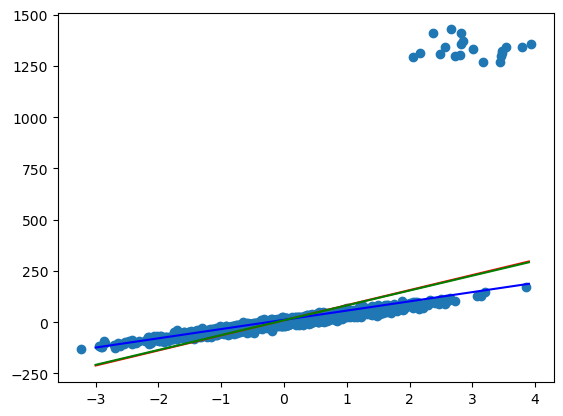

In [80]:
XY_compare_regression(X,y)

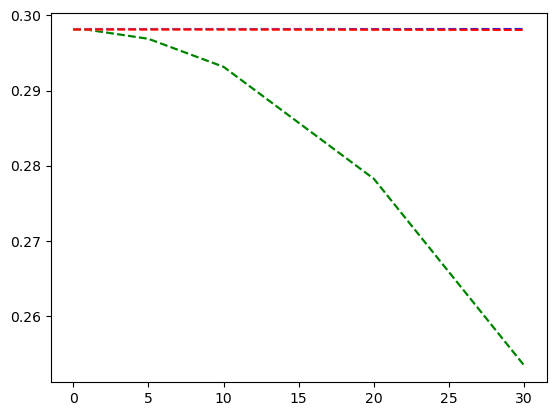

In [81]:
plot_compare_regression(X, y, X,y)

In [15]:
# create data
X1, y1 = make_regression(n_samples=40, n_features=20, noise=10, random_state=42)


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1,y1,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)

In [17]:
X_train.shape

(30, 20)

In [38]:
# compare models
def multivar_compare_regression(X_train,y_train, X_test, y_test, alpha, print_score='yes'):
    # OLS 
    ols = LinearRegression().fit(X_train, y_train)
    score = ols.score(X_train, y_train)
    score1 = ols.score(X_test, y_test)
    eqn = print_equation(ols)
    if print_score:
        print(f'OLS Score:  {score:0.2f},{score1:0.2f}, Equation = {eqn}\n')

    # LASSO
    lasso = Lasso(alpha=alpha).fit(X_train, y_train)
    score2 = lasso.score(X_train, y_train)
    score3 = lasso.score(X_test, y_test)
    eqn = print_equation(lasso)
    if print_score:
        print(f'LASSO Score:  {score2:0.2f},{score3:0.2f}, Equation = {eqn}\n')

    # RIDGE
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    score4 = ridge.score(X_train, y_train)
    score5 = ridge.score(X_test, y_test)
    eqn = print_equation(ridge)
    if print_score:
        print(f'RIDGE Score:  {score4:0.2f},{score5:0.2f}, Equation = {eqn}\n')
    
    return {'ols_train':score, 'ols_test':score1, 'lasso_train':score2, 'lasso_test':score3, 'ridge_train':score4, 'ridge_test':score5}


In [39]:
multivar_compare_regression(X_train,y_train, X_test, y_test, alpha=10)


OLS Score:  0.96,0.95, Equation = 68.9823 x_0 + 41.2240 x_1 + 5.1533 x_2 + 1.4871 x_3 + 73.0948 x_4 + 93.5947 x_5 + 0.1085

LASSO Score:  0.00,-0.02, Equation = 0.0000 x_0 + 0.0000 x_1 + 0.0000 x_2 + 0.0000 x_3 + 0.0000 x_4 + 0.0000 x_5 + -1.1582

RIDGE Score:  0.12,0.10, Equation = 3.3553 x_0 + 0.7519 x_1 + 0.0234 x_2 + 0.5788 x_3 + 4.7187 x_4 + 6.7413 x_5 + -1.085



{'ols_train': 0.9639686249208685,
 'ols_test': 0.9497864944261265,
 'lasso_train': 0.0,
 'lasso_test': -0.016417991200050386,
 'ridge_train': 0.12036309471214812,
 'ridge_test': 0.10301318855303387}

In [59]:
def plot_compare_regression(X_train,y_train, X_test, y_test):
    alpha_values = [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 20, 30]
    scores = []
    
    for i in alpha_values:
        results = multivar_compare_regression(X_train,y_train, X_test, y_test, alpha=i, print_score=None)
        scores.append(results)
        
    ols_scores_train = list(map(lambda x: x['ols_train'], scores))
    lasso_scores_train = list(map(lambda x: x['lasso_train'], scores))
    ridge_scores_train = list(map(lambda x: x['ridge_train'], scores))
    ols_scores_test = list(map(lambda x: x['ols_test'], scores))
    lasso_scores_test = list(map(lambda x: x['lasso_test'], scores))
    ridge_scores_test = list(map(lambda x: x['ridge_test'], scores))  
    
    plt.plot(alpha_values, ols_scores_train, color='lightblue', linestyle='--')
    plt.plot(alpha_values, ols_scores_test, color='blue', linestyle='--')
    plt.plot(alpha_values, lasso_scores_train, color='lightgreen', linestyle='--')
    plt.plot(alpha_values, lasso_scores_test, color='green', linestyle='--')
    plt.plot(alpha_values, ridge_scores_train, color='lightsalmon', linestyle='--')
    plt.plot(alpha_values, ridge_scores_test, color='red', linestyle='--')


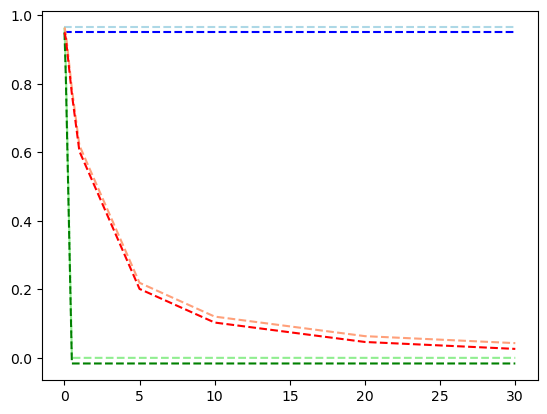

In [60]:
plot_compare_regression(X_train,y_train, X_test, y_test)

#### Outcome
OLS performs well and is very resilient to errors.
LASSO can perform well if there are outliers if an aggressive penalty is included.
RIDGE does not perform well with the current datasets, even when given a dataset where the number of rows slightly outnumbered the number of features.  

#### Next Steps
I will test the following data sets:  
*  a dataset that has high collinearity
*  a dataset with more features than records

In [61]:
# create data set of 6 features with 4 significant and 2 useless
X,y,coef = make_regression(n_samples=200, 
                           n_features=6, 
                           n_informative=4, 
                           coef=True,
                           n_targets=1, 
                           bias=0, 
                           effective_rank=4, 
                           tail_strength=0.5,
                           noise=0, 
                           random_state=42)

In [62]:
coef

array([ 0.        , 71.75977657,  0.        , 42.81996149, 99.12559937,
       69.24361513])

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)

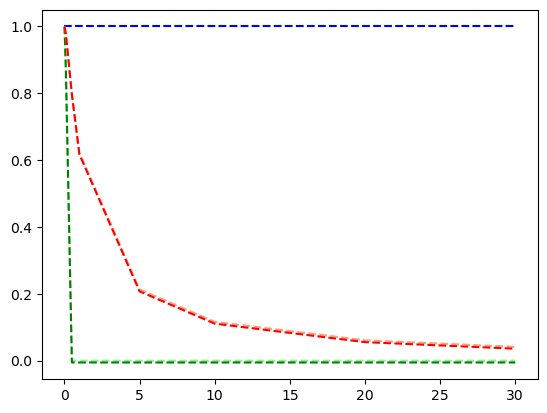

In [64]:
plot_compare_regression(X_train,y_train, X_test, y_test)

In [23]:
multivar_compare_regression(X_train,y_train, X_test, y_test, alpha=20)


OLS Score:  1.00,1.00, Equation = -0.0 x_0 + 71.7598 x_1 + 0.0 x_2 + 42.82 x_3 + 99.1256 x_4 + 69.2436 x_5 + 0.0

LASSO Score:  0.00,-0.01, Equation = -0.0 x_0 + 0.0 x_1 + 0.0 x_2 + 0.0 x_3 + 0.0 x_4 + 0.0 x_5 + -1.7009

RIDGE Score:  0.06,0.06, Equation = -0.2076 x_0 + 1.8415 x_1 + 0.4597 x_2 + 0.4474 x_3 + 3.4253 x_4 + 1.9486 x_5 + -1.6521



In [24]:
multivar_compare_regression(X_train,y_train, X_test, y_test, alpha=1)

OLS Score:  1.00,1.00, Equation = -0.0 x_0 + 71.7598 x_1 + 0.0 x_2 + 42.82 x_3 + 99.1256 x_4 + 69.2436 x_5 + 0.0

LASSO Score:  0.00,-0.01, Equation = -0.0 x_0 + 0.0 x_1 + 0.0 x_2 + 0.0 x_3 + 0.0 x_4 + 0.0 x_5 + -1.7009

RIDGE Score:  0.62,0.62, Equation = -2.4799 x_0 + 24.4833 x_1 + 4.7615 x_2 + 7.6015 x_3 + 41.9251 x_4 + 24.2411 x_5 + -1.0866



In [27]:
multivar_compare_regression(X_train,y_train, X_test, y_test, alpha=0.1)

OLS Score:  1.00,1.00, Equation = -0.0000 x_0 + 71.7598 x_1 + 0.0000 x_2 + 42.8200 x_3 + 99.1256 x_4 + 69.2436 x_5 + 0.0

LASSO Score:  0.87,0.87, Equation = -0.0000 x_0 + 42.3958 x_1 + 0.0000 x_2 + 0.0000 x_3 + 83.1920 x_4 + 33.4761 x_5 + -0.6732

RIDGE Score:  0.98,0.98, Equation = -2.5907 x_0 + 59.5736 x_1 + 4.0816 x_2 + 29.2813 x_3 + 88.1519 x_4 + 56.6297 x_5 + -0.2821



In [65]:
# create data set of 6 features with 4 significant and 2 useless
X,y,coef = make_regression(n_samples=200, 
                           n_features=6, 
                           n_informative=4, 
                           coef=True,
                           n_targets=1, 
                           bias=0, 
                           effective_rank=4, 
                           tail_strength=0.5,
                           noise=2, 
                           random_state=42)

In [66]:
coef

array([69.24361513, 42.81996149,  0.        ,  0.        , 71.75977657,
       99.12559937])

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)

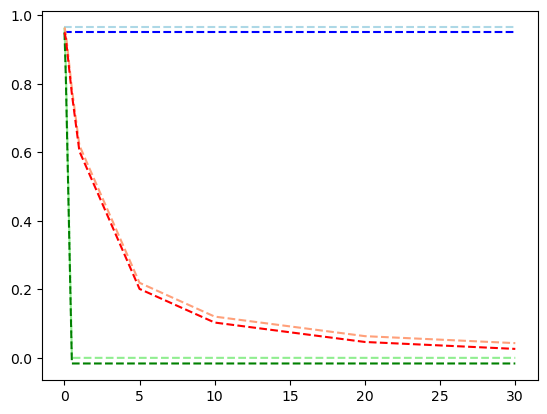

In [68]:
plot_compare_regression(X_train,y_train, X_test, y_test)

In [31]:
multivar_compare_regression(X_train,y_train, X_test, y_test, alpha=0.1)

OLS Score:  0.96,0.95, Equation = 68.9823 x_0 + 41.2240 x_1 + 5.1533 x_2 + 1.4871 x_3 + 73.0948 x_4 + 93.5947 x_5 + 0.1085

LASSO Score:  0.84,0.81, Equation = 31.1786 x_0 + 0.0000 x_1 + 0.0000 x_2 + 0.0000 x_3 + 48.4889 x_4 + 78.0288 x_5 + -0.4117

RIDGE Score:  0.95,0.93, Equation = 55.7923 x_0 + 28.8635 x_1 + 2.5407 x_2 + 4.2459 x_3 + 63.0058 x_4 + 83.9735 x_5 + -0.0913



#### Outcome
With data that has 4 of 6 valid features and some noise, a small apha was needed to get a good score.  The interesting aspect of this is that the OLS predicted a coef for every feature while at alpha of 0.1 lasso predicted two of the correct zero 

In [ ]:
# More complex data - mixed data
df = pd.read_csv('../data/regression_data/6-features-1-categorical.csv')
df.head()